In [280]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import cartopy as cart
import cartopy.crs as ccrs
import cmocean.cm as cmo
import seaborn as sns
from glob import glob
import cartopy.feature as cfeature
import pandas as pd

from scipy import stats
import matplotlib.cm as cm
import matplotlib

# Test

In [3]:
sim = xr.open_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/set_15/set15_500.zarr/')
sim = sim.compute()

## Continental shelf

In [262]:
shelf = sim.where(sim.seafloor < 200, drop=True)

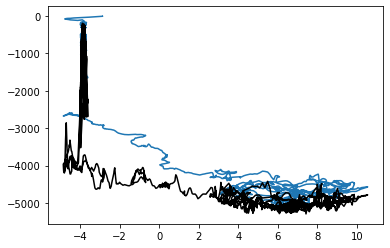

In [276]:
plt.plot(sim['lon'][8372,:], -sim['z'][8372,:])
plt.plot(sim['lon'][8372,:], -sim['seafloor'][8372,:], c='k')

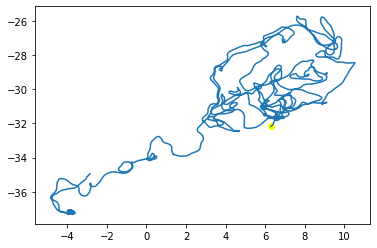

In [274]:
plt.plot(sim['lon'][8372,:], sim['lat'][8372,:])
plt.scatter(sim['lon'][8372,0], sim['lat'][8372,0], c='yellow')

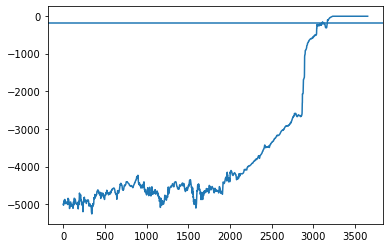

In [291]:
plt.plot(-sim['z'][8372,:])
# plt.semilogy()
plt.axhline(-200)

In [265]:
shelf['trajectory'].values

array([[8372.]])

In [286]:
shelf['time'].values

array([['2011-04-27T12:00:00.000000000']], dtype='datetime64[ns]')

In [278]:
shp_dict = {}
files = glob('../data/ne_10m_bathymetry_all/*.shp')
assert len(files) > 0
files.sort()
for f in files:
    depth = f.split('_')[-1].split('.')[0]
    # depth = '-' + f.split('_')[-1].split('.')[0]
    # depths.append(depth)
    nei = cart.io.shapereader.Reader(f)
    shp_dict[depth] = nei

depths = [d for d in shp_dict.keys()][::-1]
colors = sns.mpl_palette('cmo.ice_r',n_colors=8)
cmap   = sns.mpl_palette('cmo.ice',n_colors=8,as_cmap=True)

Text(0.5, 1.0, '10 years before sampling')

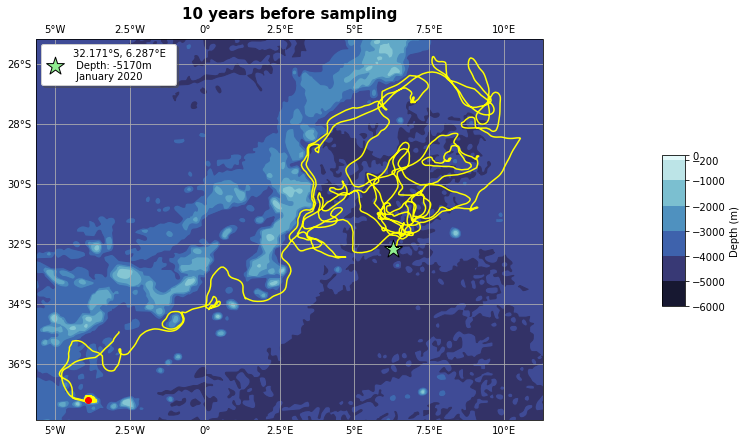

In [305]:
max_depth = -5500
min_depth = 0 

fig = plt.figure(figsize=(13,7))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent((-5, 20, -40, -25), crs=ccrs.PlateCarree())


i = 0
for depth in depths[:8]:
    ax.add_geometries(shp_dict[depth].geometries(),crs=ccrs.PlateCarree(),color=colors[i])
    i+=1

ax.add_feature(cart.feature.NaturalEarthFeature(category='physical',name='land',scale='110m'),color='grey',
              zorder=0)

gl = ax.gridlines(draw_labels=True)
gl.right_labels = False

# Add custom colorbar
axi = fig.add_axes([0.910,0.35,0.025,0.3])
# axi = fig.add_axes([0.8,0.2,0.025,0.6])
norm = matplotlib.colors.Normalize(vmin=-6000,vmax=0)
cbar = matplotlib.colorbar.ColorbarBase(ax=axi,cmap=cmap,norm=norm,
        boundaries=(-np.array(depths[:8]).astype(int)).tolist()[::-1],
        ticks=-np.array(depths).astype(int),
        spacing='proportional',
        extend='neither',
        label='Depth (m)'
        )

ax.scatter(6.287, -32.171, marker='*',
           zorder=5, color='lightgreen', 
           label='32.171°S, 6.287°E  \n Depth: -5170m \n January 2020', 
           s=350,
          edgecolors='black')

ax.legend(loc='upper left', shadow=True, fontsize=10)
    
frame = -1
ax.plot(sim['lon'][8372,:], sim['lat'][8372,:], zorder=4, c='yellow')
ax.scatter(shelf['lon'][:,:], shelf['lat'][:,:], zorder=5, c='red')
ax.scatter(sim['lon'][8372,-10], sim['lat'][8372,-10], zorder=5, c='red')

# bar_ax = fig.add_axes([0.3, 0.05, 0.4, 0.03])
# fig.colorbar(im, cax=bar_ax, orientation='horizontal', label='Particle diameter (m)')
ax.set_title('10 years before sampling', fontsize=15, weight='bold')
# plt.savefig('../figs/revers.png')

### Nanoparticles

In [4]:
nano = sim.where(sim.diameter < 1e-6, drop=True)

[]

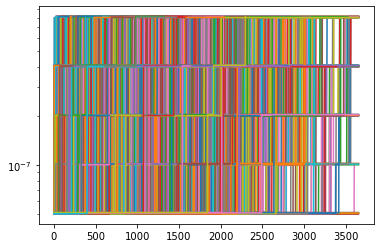

In [5]:
for i in range(0, 10000, 1):
    plt.plot(nano['diameter'][i,:])

# plt.axhline(1e-3, color='black', linestyle='--')
plt.semilogy()
# plt.xlim(-10,10)

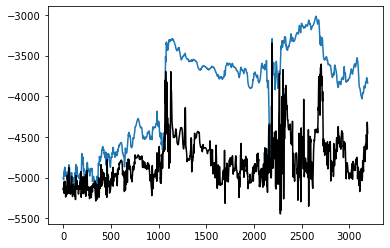

In [251]:
plt.plot(-nano['z'][1000,:])
plt.plot(-nano['seafloor'][1000,:], c='k')

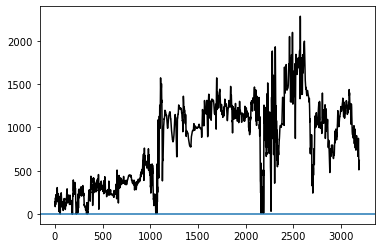

In [253]:
plt.plot(nano['seafloor'][1000,:] - nano['z'][1000,:], c='k')
plt.axhline(0)

KeyboardInterrupt: 

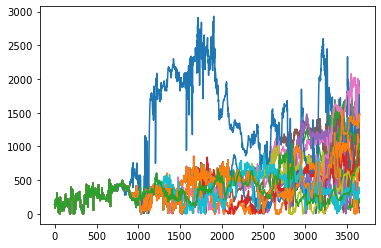

In [250]:
for i in range(0, 100, 1):
    plt.plot(nano['seafloor'][i,:] - nano['z'][i,:])

# plt.axhline(1e-3, color='black', linestyle='--')
# plt.semilogy()
# plt.xlim(-10,10)

In [14]:
bins =  np.linspace(-5200, 0, 53)

In [124]:
time = np.linspace(0, 3650, 366)

In [120]:
range(0, 3651, 10)

range(0, 3651, 10)

In [125]:
bins.shape

(53,)

In [126]:
time.shape

(366,)

In [48]:
nano['z']

<xarray.DataArray 'z' (traj: 10000, obs: 3651)>
array([[5000.        , 5011.746871  , 5015.00148184, ..., 3251.76607301,
        3253.5594962 , 3254.66640659],
       [5000.        , 5011.74687127, 5015.00148238, ...,           nan,
                  nan,           nan],
       [5000.        , 5011.74687109, 5015.00148202, ...,           nan,
                  nan,           nan],
       ...,
       [5000.        , 5011.74687134, 5015.00148252, ...,           nan,
                  nan,           nan],
       [5000.        , 5011.74687011, 5015.00148009, ...,           nan,
                  nan,           nan],
       [5000.        , 5011.74687143, 5015.0014827 , ...,           nan,
                  nan,           nan]])
Dimensions without coordinates: traj, obs
Attributes:
    long_name:      
    positive:       down
    standard_name:  depth
    units:          m

In [241]:
statz = {}
counts = {}

for ft in [500, 2500, 5000]:
    print(ft)
    sim = xr.open_zarr(f'/storage/shared/oceanparcels/output_data/data_Claudio/set_15/set15_{ft}.zarr')
# sim = sim.compute()
    nano = sim.where(sim.diameter < 1e-6, drop=True)
    hist_counts = np.zeros((52, 3651))

    for i, fr in enumerate(range(0, 3651, 1)):
    #     print(i)

        x = plt.hist(-nano['z'][:,fr], bins=bins, label = fr, density=False)
        hist_counts[:, i] = x[0]

    plt.close()

    total_particles = np.sum(hist_counts, axis=0)
    statz[ft] = hist_counts
    counts[ft] = total_particles
    
# plt.legend()
# plt.xlim(-5200, -3000)

500
2500
5000


In [232]:
a = np.ma.masked_equal(statz[500], 0)

In [ ]:
bins

/tmp/ipykernel_171301/3930218328.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im1 = ax[1].pcolormesh(x, y, a/counts[500], cmap='jet')
/tmp/ipykernel_171301/3930218328.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im2= ax[2].pcolormesh(x, y, b/counts[2500], cmap='jet')
/tmp/ipykernel_171301/3930218328.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corne

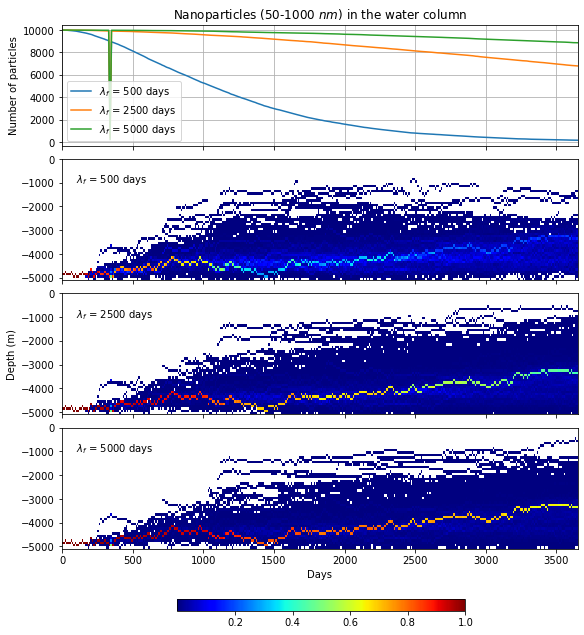

In [236]:
x, y = np.meshgrid(time, bins[1:])

fig, ax = plt.subplots(ncols=1, nrows=4, figsize=(8, 8),
                       sharex=True, constrained_layout=True)

for ft in [500, 2500, 5000]:
    ax[0].plot(time, counts[ft],label=f'$\lambda_f$ = {ft} days')
    ax[0].legend()
    

ax[0].set_ylabel('Number of particles')
# ax[1].set_ylabel('Number of particles')  
ax[2].set_ylabel('Depth (m)')  
ax[3].set_xlabel('Days') 

ax[0].grid()

# plt.text()
a = np.ma.masked_equal(statz[500], 0)
im1 = ax[1].pcolormesh(x, y, a/counts[500], cmap='jet')
ax[1].text(100, -1000, '$\lambda_f$ = 500 days')

b = np.ma.masked_equal(statz[2500], 0)
im2= ax[2].pcolormesh(x, y, b/counts[2500], cmap='jet')
ax[2].text(100, -1000, '$\lambda_f$ = 2500 days')


c = np.ma.masked_equal(statz[5000], 0)
im3 = ax[3].pcolormesh(x, y, c/counts[5000], cmap='jet')
ax[3].text(100, -1000, '$\lambda_f$ = 5000 days')


bar_ax = fig.add_axes([0.3, -0.05, 0.5, 0.02])

cbar = fig.colorbar(im3, cax=bar_ax, orientation='horizontal')
# ax[0].pcolormesh(x, y, -hist_counts, cmap='viridis')
ax[0].set_title('Nanoparticles (50-1000 $nm$) in the water column')
plt.savefig('../figs/frag_t_Vdist_nano.png', dpi=300)

0 5000
1 2500
2 500


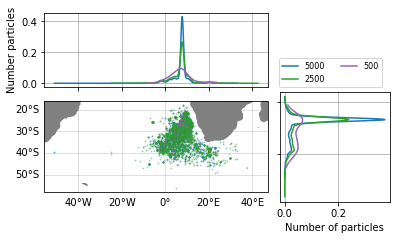

In [238]:
frame = 0
n_day = 360

fig = plt.figure()
gs = fig.add_gridspec(3, 2,  width_ratios=(6.1, 3), height_ratios=(2, 3, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.07, hspace=0.07)

ax = plt.subplot(gs[1, 0], projection=ccrs.PlateCarree())
# ax.set_extent((-45, 46, -52, -16))
ax.add_feature(cfeature.LAND,facecolor='#808080', zorder=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5)
gl.right_labels = False
gl.top_labels = False

ax_lon = plt.subplot(gs[0, 0], sharex=ax)
ax_lon.grid()
ax_lon.set_xticklabels([])
ax_lon.set_ylabel('Number particles')
# ax_lon.set_ylim(-5000, 0)

ax_lat = plt.subplot(gs[1, 1], sharey=ax)
ax_lat.grid()
ax_lat.set_yticklabels([])
ax_lat.set_xlabel('Number of particles')


ax_void = plt.subplot(gs[0, 1], sharey=ax)
ax_void.axis('off')


size_point = 0.7
frame = -1

frag_times = [5000, 2500, 500]

colormap='tab10'
x_colors = np.linspace(0, 0.4, len(frag_times))
colors = cm.get_cmap(colormap)(x_colors)

for i, ft in enumerate(frag_times):
    print(i, ft)
    sim = xr.open_zarr(f'/storage/shared/oceanparcels/output_data/data_Claudio/set_15/set15_{ft}.zarr/')
    suf = sim.where(sim.diameter < 1e-6, drop=True)
    
    xmin = suf['lon'][:,-1].dropna(dim='traj').min().values
    xmax = suf['lon'][:,-1].dropna(dim='traj').max().values
    ymin = suf['lat'][:,-1].dropna(dim='traj').min().values
    ymax = suf['lat'][:,-1].dropna(dim='traj').max().values
    x_range = np.linspace(xmin, xmax, 500)
    y_range = np.linspace(ymin, ymax, 500)
    
    kernel_lon = stats.gaussian_kde(suf['lon'][:,-1].dropna(dim='traj'))
    kernel_lat = stats.gaussian_kde(suf['lat'][:,-1].dropna(dim='traj'))
    
    kde_lon = kernel_lon(x_range)
    kde_lat = kernel_lat(y_range)
    
    n_surf_part = suf['lon'][:,-1].dropna(dim='traj').shape[0]
    
    ax.scatter(suf['lon'][:,frame], suf['lat'][:,frame], color=colors[i], zorder=4, s=1, alpha=0.3)

    ax_lon.plot(x_range, kde_lon, color=colors[i], label=ft)
    ax_lat.plot(kde_lat, y_range, color=colors[i])
    
ax_lon.legend(loc=(1.05, 0.), ncol=2, fontsize=8)

plt.savefig('../figs/frag_t_Hdist_nano.png', dpi=300)

0 5000


ValueError: zero-size array to reduction operation fmin which has no identity

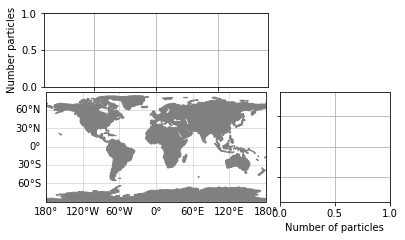

In [234]:
frame = 0
n_day = 360

fig = plt.figure()
gs = fig.add_gridspec(3, 2,  width_ratios=(6.1, 3), height_ratios=(2, 3, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.07, hspace=0.07)

ax = plt.subplot(gs[1, 0], projection=ccrs.PlateCarree())
# ax.set_extent((-45, 46, -52, -16))
ax.add_feature(cfeature.LAND,facecolor='#808080', zorder=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5)
gl.right_labels = False
gl.top_labels = False

ax_lon = plt.subplot(gs[0, 0], sharex=ax)
ax_lon.grid()
ax_lon.set_xticklabels([])
ax_lon.set_ylabel('Number particles')
# ax_lon.set_ylim(-5000, 0)

ax_lat = plt.subplot(gs[1, 1], sharey=ax)
ax_lat.grid()
ax_lat.set_yticklabels([])
ax_lat.set_xlabel('Number of particles')


ax_void = plt.subplot(gs[0, 1], sharey=ax)
ax_void.axis('off')


size_point = 0.7
frame = -1

frag_times = [5000, 2500, 500]

colormap='tab10'
x_colors = np.linspace(0, 0.4, len(frag_times))
colors = cm.get_cmap(colormap)(x_colors)

for i, ft in enumerate(frag_times):
    print(i, ft)
    suf = xr.open_zarr(f'/storage/shared/oceanparcels/output_data/data_Claudio/set_15/set15_{ft}.zarr/')
#     suf = sim.where(sim.diameter < 1e-6, drop=True)
    
    xmin = suf['lon'][:,-1].dropna(dim='traj').min().values
    xmax = suf['lon'][:,-1].dropna(dim='traj').max().values
    ymin = suf['lat'][:,-1].dropna(dim='traj').min().values
    ymax = suf['lat'][:,-1].dropna(dim='traj').max().values
    x_range = np.linspace(xmin, xmax, 500)
    y_range = np.linspace(ymin, ymax, 500)
    
    kernel_lon = stats.gaussian_kde(suf['lon'][:,-1].dropna(dim='traj'))
    kernel_lat = stats.gaussian_kde(suf['lat'][:,-1].dropna(dim='traj'))
    
    kde_lon = kernel_lon(x_range)
    kde_lat = kernel_lat(y_range)
    
    n_surf_part = suf['lon'][:,-1].dropna(dim='traj').shape[0]
    
    ax.scatter(suf['lon'][:,frame], suf['lat'][:,frame], color=colors[i], zorder=4, s=2, alpha=0.6)

    ax_lon.plot(x_range, kde_lon, color=colors[i], label=ft)
    ax_lat.plot(kde_lat, y_range, color=colors[i])
    
ax_lon.legend(loc=(1.05, 0.), ncol=2, fontsize=8)

# plt.savefig('../figs/frag_t_Hdist_nano.png', dpi=300)